**Escolha da função:**  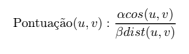

Foi escolhida a função pois quanto maior o cosseno e menor a distância, maior será a pontuação, mostrando assim quais são os vetores mais próximos. Os escaleres tem valor 1 pois não foi notado uma mudança significativa com outros valores.
Uma observação é que resultados melhores foram notados filtrando apenas pela menor distância.

PS: Para executar precisa colocar o arquivo scores.csv e movies.csv na mesma pasta.

# Iniciando as bibliotecas e lendo o arquivo **scores.csv**

In [ ]:
import pandas as pd
import numpy as np

scores = pd.read_csv('scores.csv')

# Pega de 1128 em 1128 registros e coloca em um **np.array** e concantena na lista, e então retorna a lista.

In [ ]:
def retornaValoresEmVet(scores):
  tamanho = int(scores.shape[0]/1128)
  indice = int(scores['movieid'].loc[:0])
  lista = []
  for i in range(tamanho):
    x = np.array(scores['relevance'].loc[scores['movieid']==indice])
    indice+=1
    lista.append(x)
  return lista

lista = retornaValoresEmVet(scores)

# Função **cosseno** e **distância**

In [ ]:
def cos(u,v):
  return (u @ v)/np.linalg.norm(u)*np.linalg.norm(v)

def dist(u,v):
  return np.linalg.norm(u-v)

# Retorna um vetor com o índice dos 5 filmes com a maior pontuação.

In [ ]:
def maisRelacionados(f, lista):
  pontuacao = []
  for i in range(len(lista)):
    if set(lista[f]) == set(lista[i]):
      pontuacao.append(0)
    else:
      alpha = 1
      beta = 1
      pontuacao.append((alpha*cos(lista[f],lista[i]))/(beta*dist(lista[f],lista[i])))
  pontuacao = np.array(pontuacao).argsort()[-5:]
  return pontuacao

In [ ]:
movies = pd.read_csv('movies.csv')

# Pega o vetor ou número dado, e pesquisa os índices na lista movies

In [ ]:
def getMovieName(n,movies):
  if not isinstance(n, int):
    movies_names = []
    for i in n:
      movies_names.append(movies['title'].loc[movies['id']==i].to_string(index=False))
    return movies_names
  else:
    return movies['title'].loc[movies['id']==n].to_string(index=False)

In [ ]:
search_movie = int(input("Digite o id do filme a ser buscado: "))
mr = maisRelacionados(search_movie, lista)
print("Os filmes mais relacionados com",getMovieName(search_movie,movies)," são: \n",
      getMovieName(mr,movies))

Digite o id do filme a ser buscado: 46
Os filmes mais relacionados com  Seven (a.k.a. Se7en) (1995)  são: 
 [' Pulp Fiction (1994)', ' Taxi Driver (1976)', ' Reservoir Dogs (1992)', ' Silence of the Lambs, The (1991)', ' Usual Suspects, The (1995)']
